In [1]:
!pip install scikit-plot
import numpy as np # Линейная алгебра
import pandas as pd # Обработка и анализ данных
from wordcloud import WordCloud # Облако тегов
from wordcloud import STOPWORDS # Останавливает слова
import nltk # Символьная и статистическая обработка естественного языка
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns # Статистическая визуализация данных
import scikitplot as skplt #
from sklearn.model_selection import train_test_split # Разделяет массивы и матрицы в рандомные train and test subsets

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# CountVectorizer - Преобразование коллекции текстовых документов в матрицу подсчета токенов
# TfidfTransformer - Преобразование матрицы отсчета в нормализованное представление tf или tf-idf

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #класс оценок
# Accuracy Score - вычисляет точность подмножества: набор меток, предсказанных для образца
# Confusion Matrix - матрица ошибок
# Classification Report - текстовый отчет, показывающий основные показатели классификации


#import methods
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.neural_network import MLPClassifier
#from xgboost import XGBClassifier

In [2]:
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
import os
#print(os.listdir("../input"))

# Read Data

In [4]:
df = pd.df = pd.read_csv("data.csv")

# Show Data

In [5]:
df.head(11)

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
5,0,larry king live at escapenumber escapenumber p...
6,0,michael pobega wrote i'm not sure if it's the ...
7,0,hi i have this error tr sample escapenumber es...
8,1,works gateway world art explore tattooing full...
9,1,upon this account he is not only very cautious...


# Data

In [7]:
labels = {0 : "Not Spam", 1 : "Spam"}
label_counts = df['label'].value_counts()
print(df.info())
print(label_counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14575 entries, 0 to 14574
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   14575 non-null  int64 
 1   text    14575 non-null  object
dtypes: int64(1), object(1)
memory usage: 227.9+ KB
None
1    7682
0    6893
Name: label, dtype: int64


# Splitting the Test and Train Data

In [8]:
train_set, test_set, train_label, test_label = train_test_split(df, df['label'].values, test_size = 0.33, random_state = 42)
print(train_set.shape)
print(test_set.shape)
print("\nThe Trainset consists of {} records and {} features".format(train_set.shape[0],train_set.shape[1]))
print("\nThe Testset consists of {} records and {} features".format(test_set.shape[0],train_set.shape[1]))

(9765, 2)
(4810, 2)

The Trainset consists of 9765 records and 2 features

The Testset consists of 4810 records and 2 features


# Extracting N-grams from the Text Data

In [10]:
countvect = CountVectorizer(ngram_range = (2,2), )
x_counts = countvect.fit(train_set.text)

# preparing for training set
x_train_df = countvect.transform(train_set.text)

# preparing for test set
x_test_df = countvect.transform(test_set.text)

# Data Model

The Algorithms used below in this notebooks are:

 - Naive Bayes
 - K-Nearest
 - Decision Tree
 - Support Vector Machine
 - Random Forest

# Naive Bayes classifier

The accuracy of Naive Bayes clasifier is 96.73596673596674%

 [[2250   27]
 [ 130 2403]]


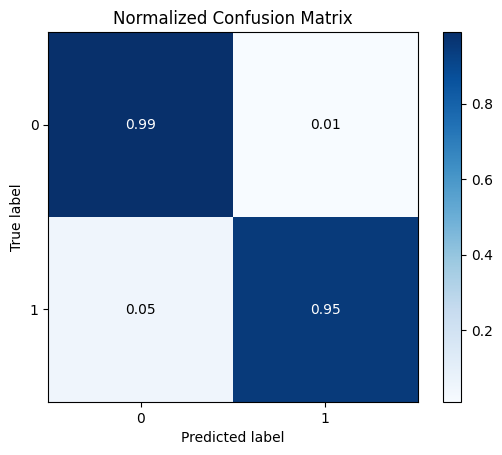

In [13]:
clf = MultinomialNB()
clf.fit(x_train_df,train_set.label)
predicted_values_NB = clf.predict(x_test_df)
predictions = dict()
accuracy = accuracy_score(test_set.label, predicted_values_NB)
predictions['Naive Bayes'] = accuracy * 100
confusionmatrix = confusion_matrix(test_set.label, predicted_values_NB)
print("The accuracy of Naive Bayes clasifier is {}%".format(accuracy * 100))
print("\n", confusionmatrix)
skplt.metrics.plot_confusion_matrix(test_set.label, predicted_values_NB, normalize = True)
plt.show()

# K-Nearest Neighbors algorithm


[1 1 1 ... 0 1 1]

The accuracy of K-Nearest Neighbors algorithm is 77.29729729729729%

 [[1253 1024]
 [  68 2465]]


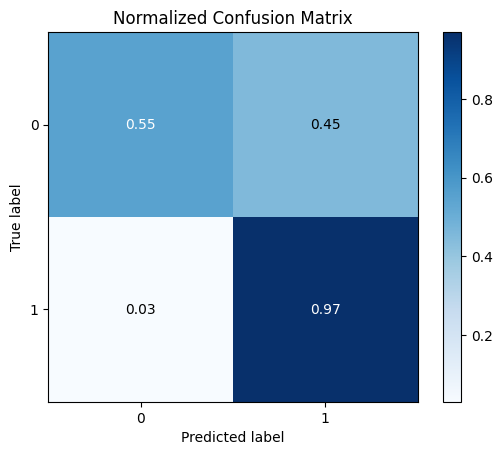

In [15]:
#KNN = KNeighborsClassifier(metric = 'euclidean')
KNN = KNeighborsClassifier()
KNN.fit(x_train_df, train_set.label)
predicted_values_KNN = KNN.predict(x_test_df)
print(predicted_values_KNN)
accuracy_KNN = accuracy_score(test_set.label, predicted_values_KNN)
predictions['K-Nearest Neighbors algorithm'] = accuracy_KNN * 100
print("\nThe accuracy of K-Nearest Neighbors algorithm is {}%".format(accuracy_KNN * 100))
confusion_matrix_KNN = confusion_matrix(test_set.label, predicted_values_KNN)
print("\n", confusion_matrix_KNN)
skplt.metrics.plot_confusion_matrix(test_set.label, predicted_values_KNN, normalize = True)
plt.show()

# Decision Tree learning

[1 1 1 ... 0 1 0]

The accuracy of Decision Tree learning is 92.14137214137214%

 [[2052  225]
 [ 153 2380]]


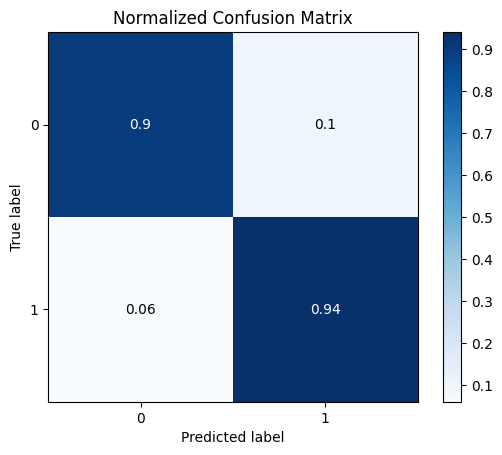

In [16]:
DT = DecisionTreeClassifier()
DT.fit(x_train_df, train_set.label)
predicted_values_DT = DT.predict(x_test_df)
print(predicted_values_DT)
accuracy_DT = accuracy_score(test_set.label, predicted_values_DT)
predictions['Decision Tree learning'] = accuracy_DT * 100
print("\nThe accuracy of Decision Tree learning is {}%".format(accuracy_DT * 100))
confusion_matrix_DT = confusion_matrix(test_set.label, predicted_values_DT)
print("\n", confusion_matrix_DT)
skplt.metrics.plot_confusion_matrix(test_set.label, predicted_values_DT, normalize = True)
plt.show()

# Support Vector Machine (SVM)

[1 1 1 ... 0 1 0]

The accuracy of Support Vector Machine (SVM) is 86.6943866943867%

 [[1665  612]
 [  28 2505]]


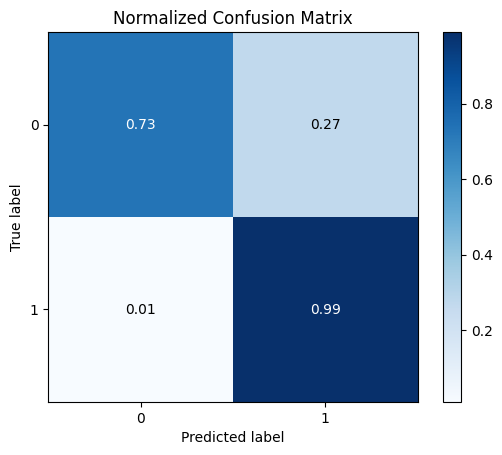

In [17]:
SVM = svm.SVC()
SVM.fit(x_train_df, train_set.label)
predicted_values_SVM = SVM.predict(x_test_df)
print(predicted_values_SVM)
accuracy_SVM = accuracy_score(test_set.label, predicted_values_SVM)
predictions['Support Vector Machine (SVM)'] = accuracy_SVM * 100
print("\nThe accuracy of Support Vector Machine (SVM) is {}%".format(accuracy_SVM * 100))
confusion_matrix_SVM = confusion_matrix(test_set.label, predicted_values_SVM)
print("\n", confusion_matrix_SVM)
skplt.metrics.plot_confusion_matrix(test_set.label, predicted_values_SVM, normalize = True)
plt.show()

# Random Forest

[1 1 0 ... 0 1 0]

The accuracy of Random Forest is 94.42827442827443%

 [[2078  199]
 [  69 2464]]


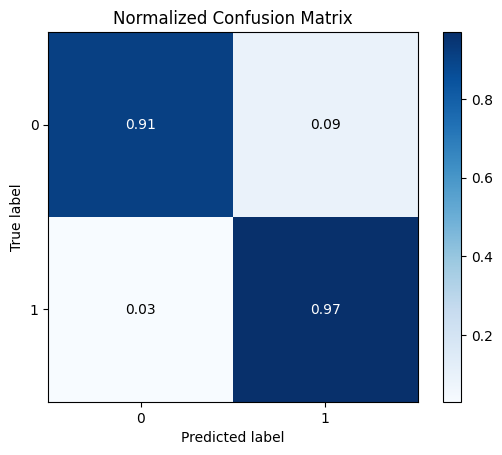

In [18]:
RF = RandomForestClassifier(n_estimators = 100, oob_score = True, random_state = 123456)
# n_estimators - количество деревьев в лесе
# oob_score - использовать ли образцы вне примеров для оценки точности обобщения
RF.fit(x_train_df, train_set.label)
predicted_values_RF = RF.predict(x_test_df)
print(predicted_values_RF)
accuracy_RF = accuracy_score(test_set.label, predicted_values_RF)
predictions['Random Forest'] = accuracy_RF * 100
print("\nThe accuracy of Random Forest is {}%".format(accuracy_RF * 100))
confusion_matrix_RF = confusion_matrix(test_set.label, predicted_values_RF)
print("\n", confusion_matrix_RF)
skplt.metrics.plot_confusion_matrix(test_set.label, predicted_values_RF, normalize = True)
plt.show()

# Method Comparison

,Algorithms,Percentage
0,Naive Bayes,96.735967
1,K-Nearest Neighbors algorithm,77.297297
2,Decision Tree learning,92.141372
3,Support Vector Machine (SVM),86.694387
4,Random Forest,94.428274


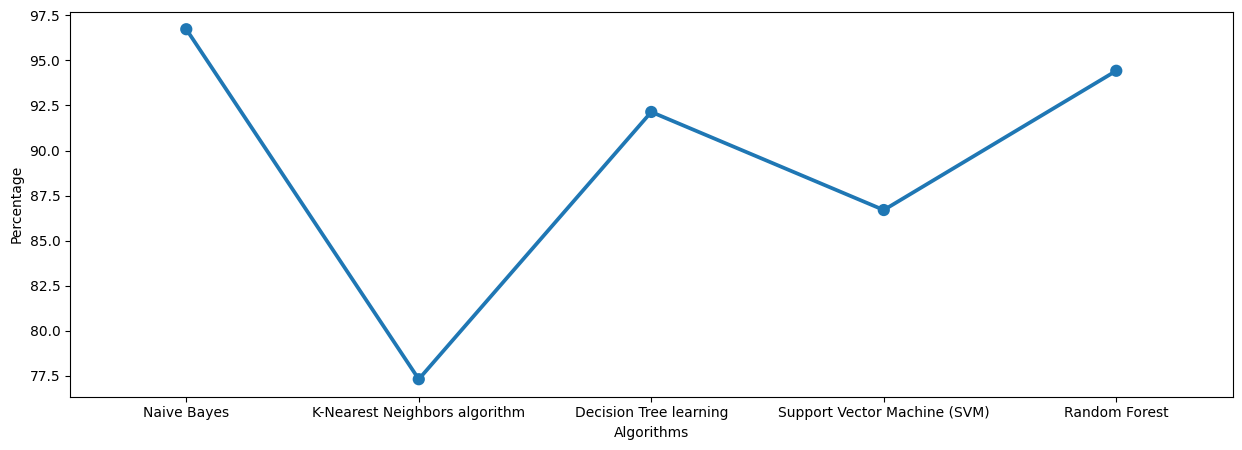

In [19]:
fig, (ax1) = plt.subplots(ncols = 1, sharey = True,figsize = (15,5))
df = pd.DataFrame(list(predictions.items()),columns = ['Algorithms','Percentage'])
display(df)
sns.pointplot(x = "Algorithms", y = "Percentage", data = df,ax = ax1);

# ROC Accuracy

In [20]:
#pr, tpr, thresholds = roc_curve(testset.v1,predicted_values_XGB, pos_label=2)
test_prediction = test_set.label.tolist()
predicted_values = predicted_values_NB.tolist()
test_prediction = [1 if pred=="spam" else 0 for pred in test_prediction]
predicted_values = [1 if pred=="spam" else 0 for pred in predicted_values]
fpr, tpr, thresholds = roc_curve(test_prediction,predicted_values)
roc_auc = auc(fpr, tpr)
print("The ROC Accuracy is {}".format(roc_auc))

The ROC Accuracy is nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


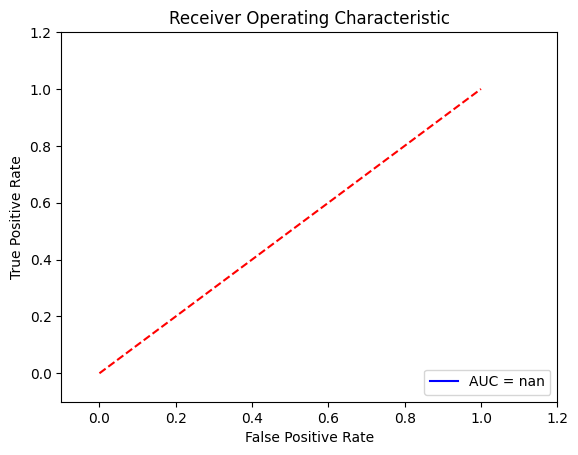

In [21]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()